# Chapter 6 - Exercises

## 1.

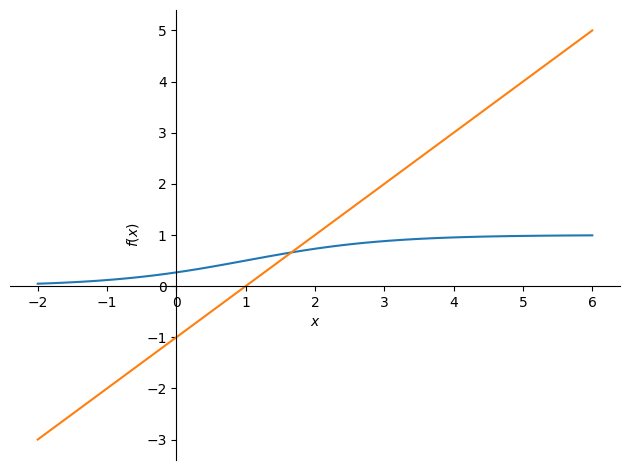

[-2.58496250072116, 2.58496250072116]

In [18]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')

p = exp(b0+b1*x)/(1+exp(b0+b1*x))

p = p.subs(b0, -1.0)
p = p.subs(b1, 1.0)

q = -1.0 + 1.0 * x

plot(p, q, (x, -2, 6))

[N(log(1/6,2)), N(log(6/1,2))]
